In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math
import random
#import plotly.figure_factory as ff
from scipy.stats import shapiro
data_gandum = pd.read_csv("Gandum.csv", header=None)
data_gandum

,0,1,2,3,4,5,6,7,8,9,10,11
0,1,5781,128.288875,58.470846,0.890095,5954,85.793926,0.674090,316.756,0.724041,2.194066,1
1,2,4176,109.348294,49.837688,0.890098,4277,72.918093,0.596231,260.346,0.774227,2.194088,1
2,3,4555,114.427991,52.151207,0.890105,4706,76.155145,0.776641,279.606,0.732159,2.194158,1
3,4,4141,108.701191,49.457349,0.890499,4236,72.611879,0.633180,260.478,0.766960,2.197877,1
4,5,5273,122.747869,55.757848,0.890876,5431,81.937733,0.669842,302.730,0.723031,2.201446,1
...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,5083,120.083450,54.821580,0.889709,5179,80.447975,0.534827,286.377,0.778850,2.190441,2
496,497,4432,112.367050,51.294914,0.889726,4550,75.119889,0.601194,270.823,0.759344,2.190608,2
497,498,5020,119.873742,54.718545,0.889740,5104,79.947874,0.528421,285.799,0.772311,2.190733,2
498,499,4035,107.311728,48.930802,0.889996,4150,71.676506,0.584698,258.503,0.758791,2.193132,2


In [6]:
#-----------------NO. 1-----------------------
#
data_gandum[[1,2,3,4,5,6,7,8,9,10]].describe()

,1,2,3,4,5,6,7,8,9,10
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,4801.246000,116.045171,53.715246,0.878764,4937.048000,77.771158,0.648372,281.479722,0.761737,2.150915
std,986.395491,18.282626,4.071075,0.036586,1011.696255,8.056867,0.094367,37.335402,0.061702,0.249767
min,2522.000000,74.133114,39.906517,0.719916,2579.000000,56.666658,0.409927,197.015000,0.174590,1.440796
25%,4042.750000,104.116098,51.193576,0.863676,4170.250000,71.745308,0.572632,255.883000,0.731991,1.983939
50%,4735.000000,115.405140,53.731199,0.890045,4857.000000,77.645277,0.626117,280.045500,0.761288,2.193599
75%,5495.500000,129.046792,56.325158,0.907578,5654.250000,83.648598,0.726633,306.062500,0.796361,2.381612
max,7453.000000,227.928583,68.977700,0.914001,7720.000000,97.413830,0.878899,488.837000,0.904748,2.464809


In [5]:
#Median
data_gandum[[1,2,3,4,5,6,7,8,9,10]].median()

1     4735.000000
2      115.405140
3       53.731199
4        0.890045
5     4857.000000
6       77.645277
7        0.626117
8      280.045500
9        0.761288
10       2.193599
dtype: float64

In [7]:
#Variansi
data_gandum[[1,2,3,4,5,6,7,8,9,10]].var()

1     9.729761e+05
2     3.342544e+02
3     1.657365e+01
4     1.338528e-03
5     1.023529e+06
6     6.491311e+01
7     8.905149e-03
8     1.393932e+03
9     3.807194e-03
10    6.238350e-02
dtype: float64

In [8]:
data_gandum[[1,2,3,4,5,6,7,8,9,10]].skew()

1     0.238144
2     0.761529
3    -0.010828
4    -1.623472
5     0.257560
6     0.002725
7     0.493661
8     0.733627
9    -3.599237
10   -0.658188
dtype: float64

In [9]:
data_gandum[[1,2,3,4,5,6,7,8,9,10]].kurtosis()

1     -0.434631
2      4.330534
3      0.475568
4      2.917256
5     -0.409685
6     -0.466455
7     -0.740326
8      2.272685
9     29.975096
10    -0.428656
dtype: float64

In [10]:
#IQR
for i in range(10):
    Q3 = np.quantile(data_gandum[i+1],0.75)
    Q1 = np.quantile(data_gandum[i+1],0.25)
    print("IQR Kolom " + str(i+1) + " : " +str(Q3-Q1))

IQR Kolom 1 : 1452.75
IQR Kolom 2 : 24.93069385000001
IQR Kolom 3 : 5.131581650000001
IQR Kolom 4 : 0.04390216424999993
IQR Kolom 5 : 1484.0
IQR Kolom 6 : 11.903290020000014
IQR Kolom 7 : 0.15400088725000005
IQR Kolom 8 : 50.17950000000002
IQR Kolom 9 : 0.06437024175000006
IQR Kolom 10 : 0.3976734275


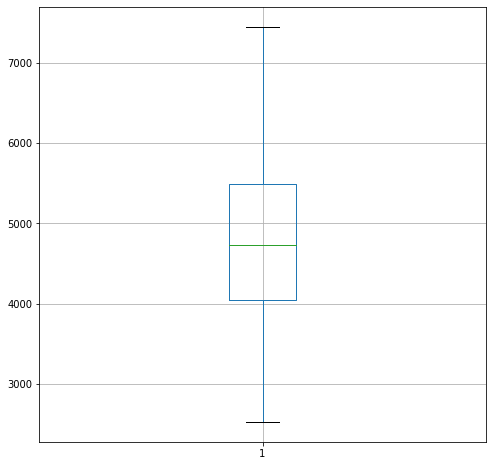

In [19]:
#-----------------NO. 2 dan NO. 3-----------------------
#Kolom Daerah (2)
plt.rcParams["figure.figsize"] = (8, 8)
data_gandum.boxplot(column=[1])

Data tidak terdistribusi normal


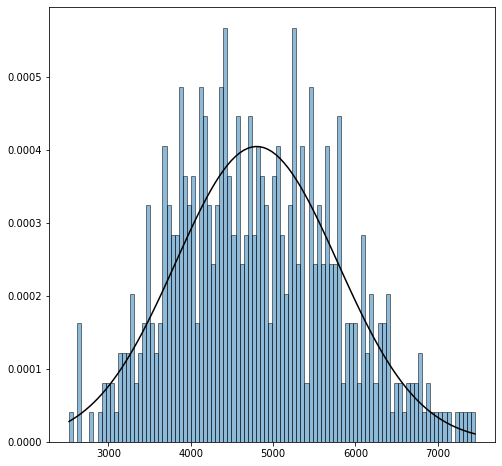

In [16]:
# plt.rcParams["figure.figsize"] = (18, 8)
# data_gandum[1].plot(kind='hist',ec='black',bins=100)

_, bins, _ = plt.hist(data_gandum[1],100,density=1,alpha=0.5,ec="black")
mu, sigma = stats.norm.fit(data_gandum[1])
best_fit_line = stats.norm.pdf(bins, mu, sigma)
plt.plot(bins, best_fit_line,color='black')

# Menggunakan metode Shapiro-Wilk Test
dummy, p = shapiro(data_gandum[1])

# interpret
alpha = 0.05
if p > alpha:
    print('Data terdistribusi normal')
else:
    print('Data tidak terdistribusi normal')

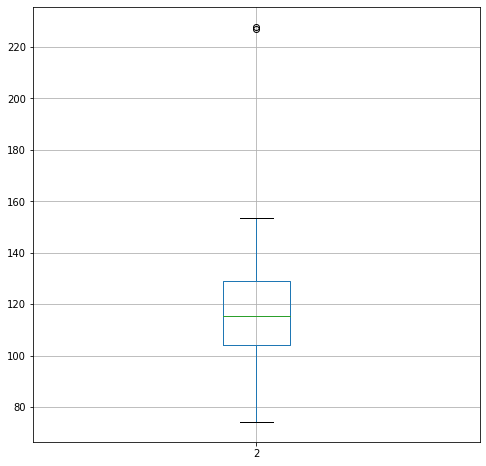

In [21]:
#Kolom SumbuUtama (3)
data_gandum.boxplot(column=[2])

Data tidak terdistribusi normal


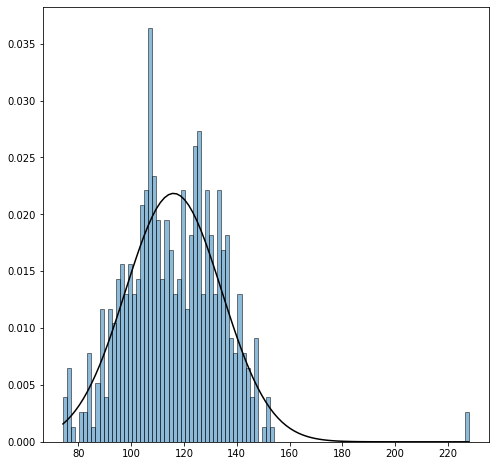

In [23]:
# plt.rcParams["figure.figsize"] = (18, 8)
# data_gandum[2].plot(kind='hist',ec='black',bins=100)

_, bins, _ = plt.hist(data_gandum[2],100,density=1,alpha=0.5,ec="black")
mu, sigma = stats.norm.fit(data_gandum[2])
best_fit_line = stats.norm.pdf(bins, mu, sigma)
plt.plot(bins, best_fit_line,color='black')

# Menggunakan metode Shapiro-Wilk Test
dummy, p = shapiro(data_gandum[2])

# interpret
alpha = 0.05
if p > alpha:
    print('Data terdistribusi normal')
else:
    print('Data tidak terdistribusi normal')

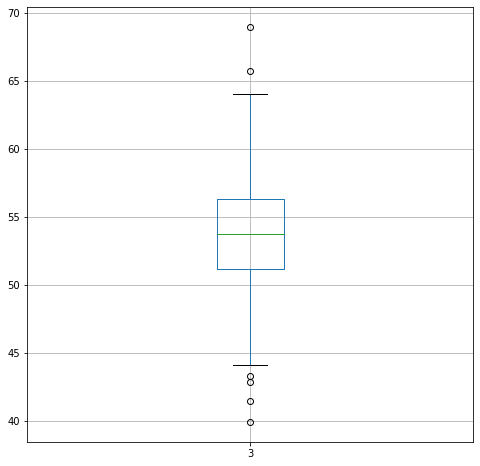

In [24]:
#Kolom SumbuKecil (4)
data_gandum.boxplot(column=[3])

Data terdistribusi normal


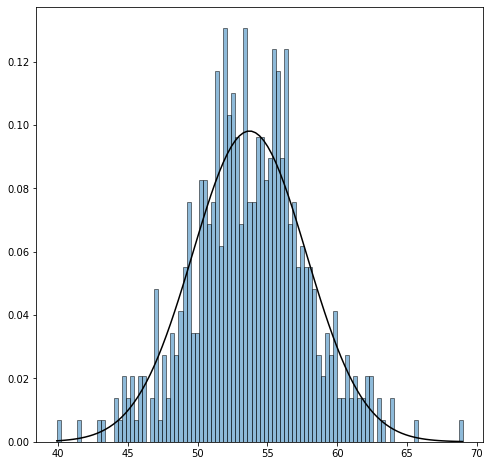

In [27]:
# plt.rcParams["figure.figsize"] = (18, 8)
# data_gandum[3].plot(kind='hist',ec='black',bins=100)

_, bins, _ = plt.hist(data_gandum[3],100,density=1,alpha=0.5,ec="black")
mu, sigma = stats.norm.fit(data_gandum[3])
best_fit_line = stats.norm.pdf(bins, mu, sigma)
plt.plot(bins, best_fit_line,color='black')

# Menggunakan metode Shapiro-Wilk Test
dummy, p = shapiro(data_gandum[3])

# interpret
alpha = 0.05
if p > alpha:
    print('Data terdistribusi normal')
else:
    print('Data tidak terdistribusi normal')

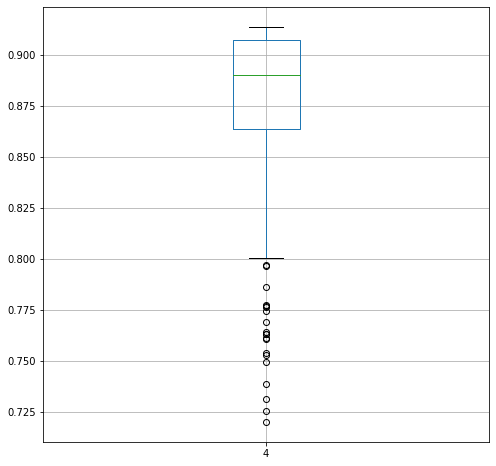

In [28]:
#Kolom Keunikan (5)
data_gandum.boxplot(column=[4])

Data tidak terdistribusi normal


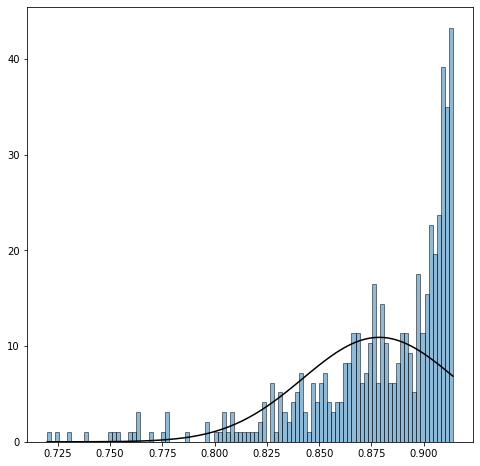

In [29]:
# plt.rcParams["figure.figsize"] = (18, 8)
# data_gandum[4].plot(kind='hist',ec='black',bins=100)

_, bins, _ = plt.hist(data_gandum[4],100,density=1,alpha=0.5,ec="black")
mu, sigma = stats.norm.fit(data_gandum[4])
best_fit_line = stats.norm.pdf(bins, mu, sigma)
plt.plot(bins, best_fit_line,color='black')

# Menggunakan metode Shapiro-Wilk Test
dummy, p = shapiro(data_gandum[4])

# interpret
alpha = 0.05
if p > alpha:
    print('Data terdistribusi normal')
else:
    print('Data tidak terdistribusi normal')

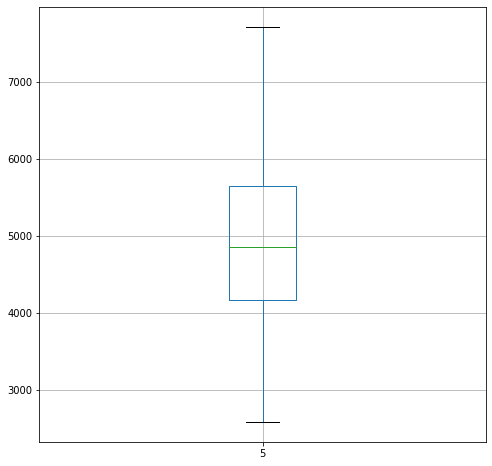

In [30]:
#Kolom AreaBulatan (6)
data_gandum.boxplot(column=[5])

Data tidak terdistribusi normal


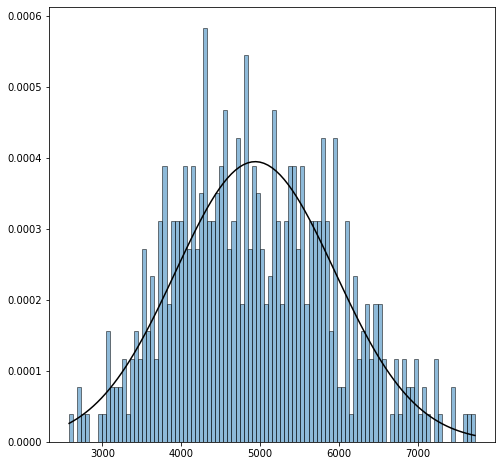

In [31]:
# plt.rcParams["figure.figsize"] = (18, 8)
# data_gandum[5].plot(kind='hist',ec='black',bins=100)

_, bins, _ = plt.hist(data_gandum[5],100,density=1,alpha=0.5,ec="black")
mu, sigma = stats.norm.fit(data_gandum[5])
best_fit_line = stats.norm.pdf(bins, mu, sigma)
plt.plot(bins, best_fit_line,color='black')

# Menggunakan metode Shapiro-Wilk Test
dummy, p = shapiro(data_gandum[5])

# interpret
alpha = 0.05
if p > alpha:
    print('Data terdistribusi normal')
else:
    print('Data tidak terdistribusi normal')

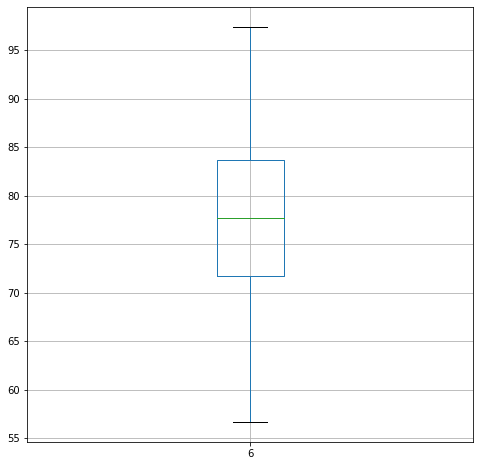

In [32]:
#Kolom Diameter (7)
data_gandum.boxplot(column=[6])

Data terdistribusi normal


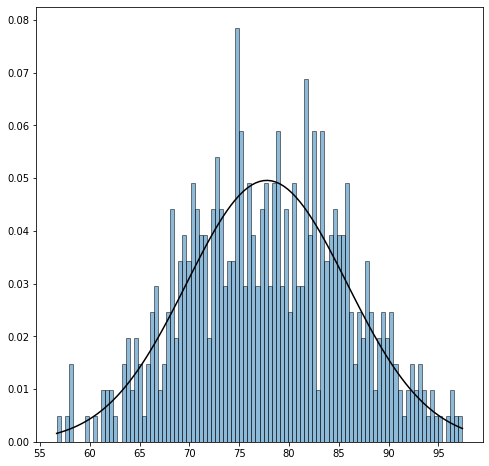

In [33]:
# plt.rcParams["figure.figsize"] = (18, 8)
# data_gandum[6].plot(kind='hist',ec='black',bins=100)

_, bins, _ = plt.hist(data_gandum[6],100,density=1,alpha=0.5,ec="black")
mu, sigma = stats.norm.fit(data_gandum[6])
best_fit_line = stats.norm.pdf(bins, mu, sigma)
plt.plot(bins, best_fit_line,color='black')

# Menggunakan metode Shapiro-Wilk Test
dummy, p = shapiro(data_gandum[6])

# interpret
alpha = 0.05
if p > alpha:
    print('Data terdistribusi normal')
else:
    print('Data tidak terdistribusi normal')

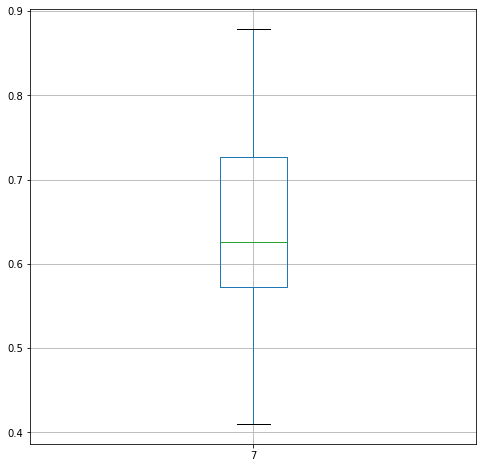

In [34]:
#Kolom KadarAir (8)
data_gandum.boxplot(column=[7])

Data tidak terdistribusi normal


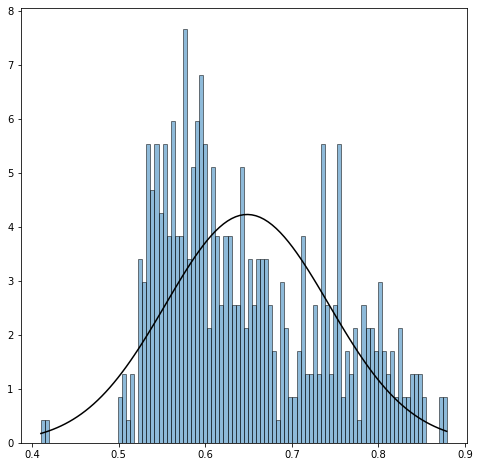

In [35]:
_, bins, _ = plt.hist(data_gandum[7],100,density=1,alpha=0.5,ec="black")
mu, sigma = stats.norm.fit(data_gandum[7])
best_fit_line = stats.norm.pdf(bins, mu, sigma)
plt.plot(bins, best_fit_line,color='black')

# Menggunakan metode Shapiro-Wilk Test
dummy, p = shapiro(data_gandum[7])

# interpret
alpha = 0.05
if p > alpha:
    print('Data terdistribusi normal')
else:
    print('Data tidak terdistribusi normal')
    
# plt.rcParams["figure.figsize"] = (18, 8)
# data_gandum[7].plot(kind='hist',ec='black',bins=100)

# sns.distplot(data_gandum[1], hist=True, kde=True,
#             bins=100, color='blue',
#             hist_kws={'edgecolor':'black'},
#             kde_kws={'linewidth':4})

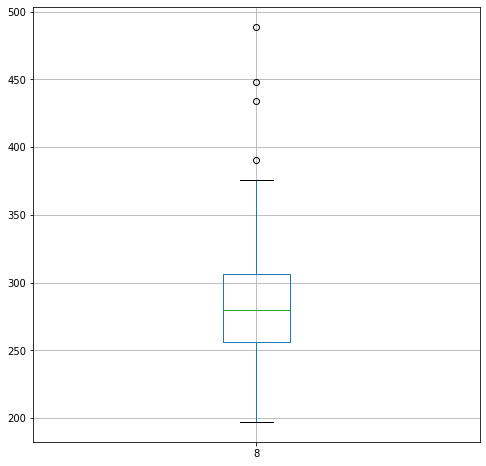

In [36]:
#Kolom Keliling (9)
data_gandum.boxplot(column=[8])

Data tidak terdistribusi normal


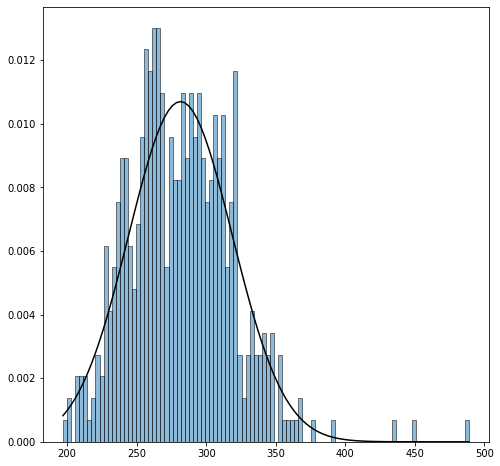

In [37]:
_, bins, _ = plt.hist(data_gandum[8],100,density=1,alpha=0.5,ec="black")
mu, sigma = stats.norm.fit(data_gandum[8])
best_fit_line = stats.norm.pdf(bins, mu, sigma)
plt.plot(bins, best_fit_line,color='black')

# Menggunakan metode Shapiro-Wilk Test
dummy, p = shapiro(data_gandum[8])

# interpret
alpha = 0.05
if p > alpha:
    print('Data terdistribusi normal')
else:
    print('Data tidak terdistribusi normal')

# plt.rcParams["figure.figsize"] = (18, 8)
# data_gandum[8].plot(kind='hist',ec='black',bins=100)

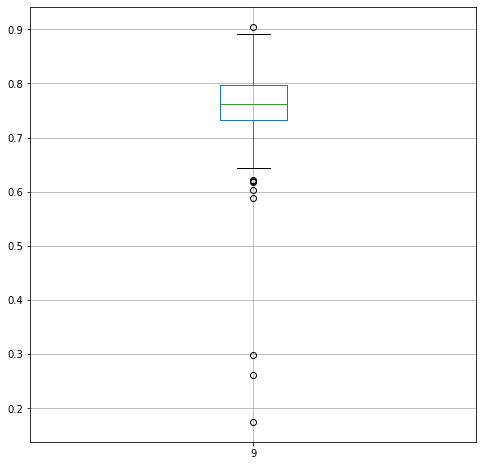

In [38]:
#Kolom Bulatan (10)
data_gandum.boxplot(column=[9])

Data tidak terdistribusi normal


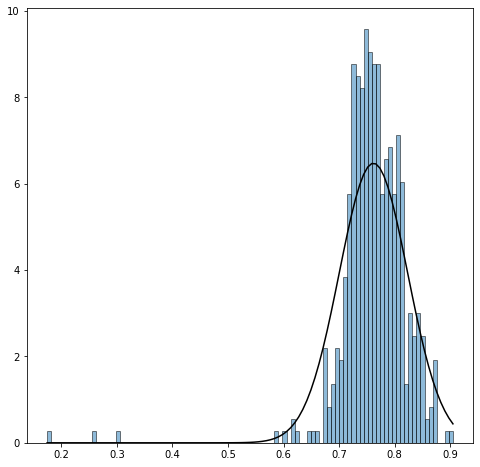

In [39]:
_, bins, _ = plt.hist(data_gandum[9],100,density=1,alpha=0.5,ec="black")
mu, sigma = stats.norm.fit(data_gandum[9])
best_fit_line = stats.norm.pdf(bins, mu, sigma)
plt.plot(bins, best_fit_line,color='black')

# plt.rcParams["figure.figsize"] = (18, 8)
# data_gandum[9].plot(kind='hist',ec='black',bins=100)

# Menggunakan metode Shapiro-Wilk Test
dummy, p = shapiro(data_gandum[9])

# interpret
alpha = 0.05
if p > alpha:
    print('Data terdistribusi normal')
else:
    print('Data tidak terdistribusi normal')

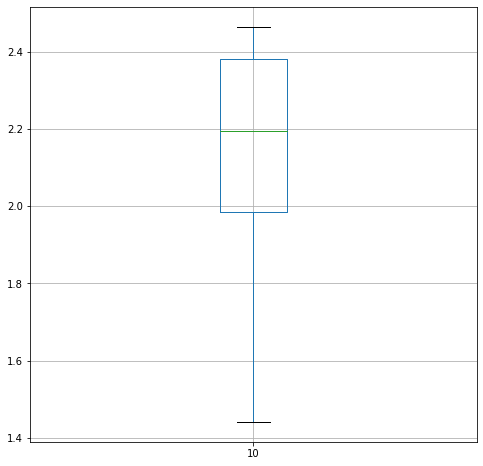

In [40]:
#Kolom Ransum (11)
data_gandum.boxplot(column=[10])

Data tidak terdistribusi normal


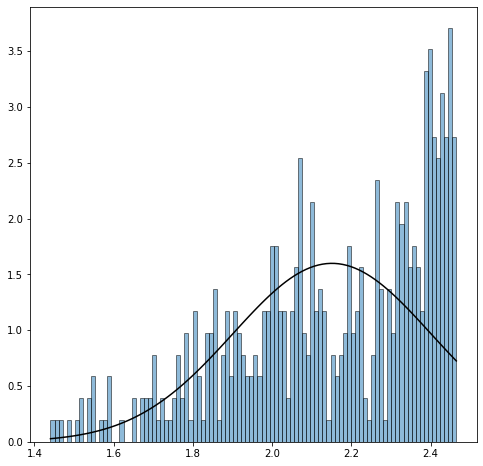

In [41]:
_, bins, _ = plt.hist(data_gandum[10],100,density=1,alpha=0.5,ec="black")
mu, sigma = stats.norm.fit(data_gandum[10])
best_fit_line = stats.norm.pdf(bins, mu, sigma)
plt.plot(bins, best_fit_line,color='black')

# Menggunakan metode Shapiro-Wilk Test
dummy, p = shapiro(data_gandum[10])

# interpret
alpha = 0.05
if p > alpha:
    print('Data terdistribusi normal')
else:
    print('Data tidak terdistribusi normal')

# plt.rcParams["figure.figsize"] = (18, 8)
# data_gandum[10].plot(kind='hist',ec='black',bins=100)

In [10]:
# ------------- No. 4 ------------
# 4.a Nilai rata-rata Daerah di atas 4700?
# 1)
# H0: miu0 = 4700

# 2)
# H1: miu1 > 4700

# 3)
# alpha: 0.05

# 4)

# sample
# sampleD = random.sample(data_gandum[1].values.tolist(),30)
sampleD = [4879, 5077, 6275, 3638, 6745, 4371, 4770, 3987, 5250, 4577, 5994, 5985, 5576, 6676, 4657, 3335, 4684, 4493, 5463, 5020, 3265, 5301, 6082, 3735, 6067, 6785, 5056, 5331, 4893, 4738]
n = len(sampleD) #jumlah data
miu0 = 4700

# Jumlah data > 85 didapatkan 10 dari fungsi dibawah ini
count = 0
for i in range(n):
    count += sampleD[i]
xbar = count/n

# nilai Z
z = ((xbar)-(miu0))/math.sqrt(data_gandum[1].var()/n)
# pvalue = P(Z > 2.166505082043134) = 1 - 0.9846
print(1-0.9846)
# karena pvalue = 0.01539999999999997 < alpha = 0.05, maka benar untuk menolak

# Z0.05 = 1.65

0.01539999999999997


In [19]:
# 4.c Nilai rata-rata 20 baris pertama kolom Sumbu Kecil bukan 50?
# 1)
# H0: miu0 = 50

# 2)
# H1: miu0 != 50

# 3)
# alpha: 0.05

# 4)
# Uji statistik dilakukan dengan distribusi normal. Daerah kritis z dengan alpha: 0.05 adalah  z< -1.96 atau z > 1.96

# 5)
# menghitung
# Hitung miu dari 20 data teratas dari Sumbu Kecil
list20 = []
sum20 = 0
for i in range(20):
    sum20 = data_gandum[3][i]+sum20
    list20.append(data_gandum[3][i])
miuPop = sum20/20

# Menggunakan metode Shapiro-Wilk Test kita tes terlebih dahulu apakah data terdistribusi normal atau tidak
dummy, p = shapiro(list20)

# interpret
alpha = 0.05
if p > alpha:
    print('Data terdistribusi normal')
else:
    print('Data tidak terdistribusi normal')

# Hitung std dari 20 data teratas dari Sumbu Kecil
pembilang = 0
for i in range(20):
    pembilang = pembilang + (list20[i] - miuPop)**2
std = math.sqrt(pembilang/20)

# Random generate sampel sebanyak 5
# menggunakan fungsi sampleD = random.sample(list20,5)
sampleD = [57.23821435, 61.31214783, 57.61755431, 56.655596499999994, 52.15120679]

# Menghitung xbar
sumSample = 0
for i in range(5):
    sumSample = sumSample + sampleD[i]
xbar = sumSample/5

# Menghitung z
z = (xbar - miuPop) / (std/math.sqrt(5))
print(z)
    
# 6)
# check z in critical region
# z = 1.433163437043158
# H0 tidak ditolak karena z tidak berada di daerah kritis (1.433163437043158 < 1.96)

# kesimpulan:
# Nilai rata-rata dari 20 data teratas Sumbu Kecil bukan 50 ADALAH SALAH

54.887276260499995
Data terdistribusi normal
1.433163437043158


In [132]:
# 4.d Proporsi nilai Diameter yang lebih dari 85, adalah tidak sama dengan 15% ?

# 1)
# H0: p = 15%

# 2)
# H1: p != 15%

# 3)
# alpha: 0.05

# 4)
# Uji statistik dilakukan dengan distribusi normal. Daerah kritis z dengan alpha: 0.05 adalah  z< -1.96 atau z > 1.96

# 5)
# Menghitung
# Generate sampel sebanyak 30
# data sample diperoleh dari fungsi : sampleD = random.sample(data_gandum[6].values.tolist(),30)
sampleD = [88.00634154, 80.47171133, 84.45524217, 78.76862511, 68.27393334, 77.72722586, 75.45811583, 64.13919994, 78.83325579, 84.75622403, 79.26813454, 92.94584612, 88.93460548, 78.83325579, 90.58713411, 77.24247864, 89.40580441, 66.44036049, 76.81270761, 85.71969093, 97.41383027, 72.48024808, 84.06992752, 85.88292428, 67.28773901, 88.36729105, 75.7444215, 74.88222055, 64.59416373, 90.09385161]
n = len(sampleD) #jumlah data
p0 = 0.15        #proporsi p0

# Jumlah data > 85 didapatkan 10 dari fungsi dibawah ini
count = 0
for i in range(30):
    if sampleD[i] > 85:
        count += 1
    
# nilai Z
z = ((count/n)-(p0))/math.sqrt(p0*(1-p0)/n)

# 6)
# check z in critical region
# z = 2.8122049591070244
# H0 ditolak karena z berada di daerah kritis (2.8122049591070244 > 1.96)
# H1 diterima

# kesimpulan:
# Proporsi nilai diameter > 85 tidak sama dengan 15% itu benar

In [8]:
# 4.e Proporsi nilai Keliling yang kurang dari 100, adalah kurang dari 5% ?

# Mengambil sample dari fungsi random.sample(data_gandum[8].values.tolist(),50)
sampleR = [227.007, 309.718, 290.143, 210.657, 321.246, 330.709, 312.89799999999997, 316.683, 275.478, 224.485, 241.24, 269.387, 343.70599999999996, 302.164, 295.728, 303.999, 265.778, 274.231, 288.27299999999997, 333.722, 274.262, 311.235, 285.184, 322.29900000000004, 291.454, 331.296, 242.06400000000002, 301.307, 331.417, 209.82299999999998, 223.11700000000002, 243.983, 348.74, 292.789, 263.0, 299.08299999999997, 322.853, 260.959, 314.656, 273.085, 226.454, 269.153, 301.902, 294.789, 315.483, 254.699, 271.228, 390.125, 235.80700000000002, 264.342]
n = len(sampleR)

# sampleR = random.sample(data_gandum[8].values.tolist(),50)
# print(sampleR)

#1. H0: P = 5%

#2. H1: P < 5%

#3. alpha = 0.05

#4. Uji statistik yang digunakan tes proporsi binomial didekati dengan normal. Dengan teorema limit pusat, populasi dianggap terdistribusi normal dengan n yang besar.
#   Dengan daerah kritisnya Z < Z0.05. Z < -1.645 

# #5. Komputasi
# menghitung proporsi obsrvasi
countUnder100 = 0
for val in sampleR:
    if (val<100):
        countUnder100 += 1
pObs = countUnder100 / n
# print(countUnder100)

# menghitung z
z = (pObs - 0.05) / math.sqrt(0.95*0.05/n)
print(z)

#6. Keputusan
#Dengan z tidak berada di daerah kritis z = -1.6222142113076254 > -1.645 maka dapat diputuskan menolak H0. P-Value dari tes ini adalah
#P(Z<-1.6222142113076254) = 0.0526 dimana nilai P-Value tersebut lebih besar dari alpha sehingga kita tidak bisa menolak H0

#KESIMPULAN
# proporsi nilai Keliling kurang dari 100% adalah 5% ADALAH BENAR

-1.6222142113076254


In [119]:
# INI REFERENSI STATISTIK
# contoh syntax sample
# sample = random.sample(data_gandum[6].values.tolist(),20)

# INI REFERENSI NORMALITY TEST

# stat, p = shapiro(data_gandum[4])

# # interpret
# alpha = 0.05
# if p > alpha:
#     msg = 'Data terdistribusi normal'
# else:
#     msg = 'Data tidak terdistribusi normal'

# result_mat = [
#     ['Length of the sample data', 'Test Statistic', 'p-value', 'Comments'],
#     [len(data_gandum[4]), stat, p, msg]
# ]

# swt_table = ff.create_table(result_mat)
# swt_table['data'][0].colorscale=[[0, '#2a3f5f'],[1, '#ffffff']]
# swt_table['layout']['height']=200
# swt_table['layout']['margin']['t']=50
# swt_table['layout']['margin']['b']=50

# py.iplot(swt_table, filename='shapiro-wilk-table')

In [ ]:
# INI REFERENSI GAMBAR

# Yang ini Hasil jelek
# mu = data_gandum[10].mean()
# variance = data_gandum[10].var()
# sigma = math.sqrt(variance)
# x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
# plt.plot(x, stats.norm.pdf(x, mu, sigma))
# plt.show()

# Yang ini Hasil bagus
# sns.distplot(data_gandum[10], hist=True, kde=True,
#             bins=100, color='blue',
#             hist_kws={'edgecolor':'black'},
#             kde_kws={'linewidth':4})

In [13]:
#-----------------NO. 5-----------------------

# 5.a)
dataAB1 = data_gandum[data_gandum[11]==1][5]
dataAB2 = data_gandum[data_gandum[11]==2][5]

# H0: miu1 = miu2

# H1: miu1 != miu2

# alpha = 0.05

# Uji statistik menggunakan Mann-Whitney U Test
# sample didapatkan dari fungsi random.sample(dataAB1.values.tolist(),20) dan random.sample(dataAB2.values.tolist(),20)
sample1 = [5381, 5949, 6386, 7583, 5304, 5513, 5668, 3723, 4558, 4995, 5834, 5019, 6542, 4122, 4355, 5761, 6785, 6426, 6053, 6537]
sample2 = [5193, 3358, 4045, 3132, 5945, 4551, 4698, 4144, 4795, 3586, 6092, 5197, 3621, 5388, 4281, 5819, 3942, 2950, 5285, 3802]

n1 = len(sample1)
n2 = len(sample2)

rank = []
for i in range(n1):
    rank.append([1,sample1[i]])
for i in range(n2):
    rank.append([2,sample2[i]])
rank.sort(key=lambda x: x[1])

R1 = 0
R2 = 0

for i in range(40):
    if(rank[i][0]==1):
        R1 += i + 1
    else:
        R2 += i + 1

U1 = (n1*n2) + (n1*(n1+1))/2 - R1
U2 = (n1*n2) + (n1*(n1+1))/2 - R2
print(U1)
print(U2)
# karena U1 = 207 > 193 = U2, maka U diambil yang terkecil, U = 193

# p0.05 = 127 berdasarkan tabel Mann-Whitney

# karena  U = 193 > 127 = p0.05, H0 diterima
# Kesimpulan: Rata-rata bagian awal dan rata-rata bagian akhir sama itu benar

81.0
319.0


In [13]:
# 5.b)

# Memisahkan data atas dan bawah dari kolom Ransum
dataKA1 = data_gandum[data_gandum[11]==1][7]
dataKA2 = data_gandum[data_gandum[11]==2][7]

# Mengambil sample dari fungsi random.sample(dataKA1.values.tolist(),50) dan random.sample(dataKA2.values.tolist(),50)
sampleR1 = [0.566356108, 0.801258872, 0.69487504, 0.673792645, 0.5250165520000001, 0.593892813, 0.579747299, 0.54781136, 0.531283711, 0.747620307, 0.794761905, 0.6664001070000001, 0.631913541, 0.54693172, 0.551971326, 0.689863445, 0.5440145989999999, 0.732283465, 0.539996069, 0.719076006, 0.557024958, 0.542996454, 0.633444075, 0.682787879, 0.7067550509999999, 0.666881374, 0.6515050170000001, 0.878899083, 0.8699186990000001, 0.514405279, 0.549528302, 0.796086957, 0.720927318, 0.741213152, 0.6767299859999999, 0.551780822, 0.737275986, 0.803747398, 0.56293578, 0.810586177, 0.654947917, 0.7348668279999999, 0.546064276, 0.526988365, 0.550558036, 0.573790627, 0.53380815, 0.5259334920000001, 0.737871675, 0.734779095]
sampleR2 = [0.553790176, 0.652214715, 0.5684466020000001, 0.8495098040000001, 0.658262108, 0.820332356, 0.66509434, 0.59477346, 0.6109375, 0.7235449740000001, 0.824404762, 0.594364937, 0.597554348, 0.813333333, 0.617575758, 0.542670683, 0.655116655, 0.661374511, 0.596730855, 0.596557121, 0.753608761, 0.576942169, 0.613541376, 0.584908425, 0.5775786070000001, 0.772633745, 0.852725367, 0.6622337660000001, 0.614003857, 0.803002502, 0.709879176, 0.563208943, 0.713008937, 0.628942245, 0.5146929179999999, 0.782818145, 0.592223803, 0.877896613, 0.759153176, 0.7970920140000001, 0.563398693, 0.575181159, 0.6422427039999999, 0.81712963, 0.53796765, 0.6092045460000001, 0.623705004, 0.833097345, 0.579075131, 0.565625386]
n1 = len(sampleR1)
n2 = len(sampleR2)

# sampleD1 = random.sample(dataKA1.values.tolist(),50)
# print(sampleD1)
# sampleD2 = random.sample(dataKA2.values.tolist(),50)
# print(sampleD2)

#1. H0 : miu1 - miu2 = 0.2

#2. H1 : miu1 - miu2 != 0.2

#3. alpha = 0.05

#4. Uji statistik yang digunakan tes proporsi antara 2 sampel dengan teorema limit pusat sehingga dengan n yang besar, populasi dianggap terdistribusi normal.
#   Dengan daerah kritisnya Z != Z0.05. Z < -1.96 atau Z > 1.96

#5. Komputasi
#rata2 sampleR1 dan sampleR2
xbar1 = sum(sampleR1) / n1
xbar2 = sum(sampleR2) / n2
# print(xbar1)
# print(xbar2)

#std populasi dataR1 dan dataR2
std1 = np.std(dataKA1) 
std2 = np.std(dataKA2)
# print(np.std(dataR1))
# print(np.std(dataR2))

#menghitung z
z = ((xbar1 - xbar2) - 0.2) / math.sqrt((std1**2 / n1) + (std2**2 / n2))
print(z)

#6. Keputusan
#Dengan z berada di daerah kritis z = -11.602281354418498 < -1.96 maka dapat diputuskan menolak H0. P-Value dari tes ini adalah
#P(Z<-11.602281354418498) dimana nilai P-Value tersebut sangat kecil (otomatis lebih kecil dari alpha) sehingga sudah fix menolak H0

#KESIMPULAN
#rata-rata bagin awal KadarAir LEBIH BESAR dari rata-rata bagian akhir KadarAir SEBESAR 0.2 ITU SALAH

-11.602281354418498


In [17]:
# 5.d)

# Memisahkan data atas dan bawah dari kolom Ransum
dataR1 = data_gandum[data_gandum[11]==1][10]
dataR2 = data_gandum[data_gandum[11]==2][10]

# Mengambil sample dari fungsi random.sample(dataR1.values.tolist(),50) dan random.sample(dataR2.values.tolist(),50)
sampleR1 = [2.2601373369999997, 2.292288889, 2.402829454, 2.4537694340000002, 2.3939091180000003, 2.416421796, 2.194158073, 2.3662528469999997, 2.43176546, 2.365691672, 2.3581407569999997, 2.226576302, 2.397473566, 2.4635457290000002, 2.267809234, 2.213027428, 2.267748924, 2.382918257, 2.449573567, 2.335253858, 2.212887655, 2.412698905, 2.44453248, 2.278028913, 2.381033342, 2.43633347, 2.31916698, 2.3101413980000003, 2.418896288, 2.383162254, 2.3441162980000003, 2.293674225, 2.4542281669999997, 2.328431431, 2.325960705, 2.4043579459999997, 2.367812796, 2.427229072, 2.4615104430000003, 2.4603080530000003, 2.2014455930000003, 2.209733911, 2.340134912, 2.330281955, 2.43330455, 2.2040126769999997, 2.35103612, 2.267500333, 2.324667319, 2.3170592169999997]
sampleR2 = [1.8638285680000002, 1.7475232809999999, 2.097097749, 1.938606424, 1.8864395919999999, 1.686592141, 2.168974314, 2.181716211, 1.8501391459999998, 2.067587589, 2.1077401890000003, 1.830091344, 2.156809452, 2.190441243, 2.011183955, 2.023376728, 1.8337401480000002, 1.96817911, 2.0630551180000003, 2.218493122, 2.1224433119999997, 1.931058138, 2.045159464, 1.8540136230000002, 2.0417904819999997, 1.88785243, 1.799959097, 1.826251811, 2.005042746, 1.51000024, 2.1248375580000003, 2.078462475, 1.88870019, 2.163122241, 2.193132409, 1.7885274580000001, 2.102246978, 2.071131797, 2.008504397, 1.817608766, 1.9209430459999999, 2.069290354, 1.978690245, 2.093760238, 2.070935285, 1.778399476, 2.063136708, 1.675639128, 1.668112772, 1.8055657019999998]
n1 = len(sampleR1)
n2 = len(sampleR2)

# sampleD1 = random.sample(dataR1.values.tolist(),50)
# print(sampleD1)
# sampleD2 = random.sample(dataR2.values.tolist(),50)
# print(sampleD2)

#1. H0 : P1 - P2 = 0

#2. H1 : P1 - P2 > 0

#3. alpha = 0.05

#4. Uji statistik yang digunakan tes proporsi antara 2 sampel dengan teorema limit pusat sehingga dengan n yang besar, populasi dianggap terdistribusi normal.
#   Dengan daerah kritisnya Z > Z0.05. Z >1.645

#5. Komputasi
#proporsi sampleR1 dan sampleR2
count1 = 0
for val1 in sampleR1:
    if (val1>2):
        count1 += 1
# print(count1)

count2 = 0
for val2 in sampleR2:
    if (val2>2):
        count2 += 1
# print(count2)

P1 = count1 / n1
P2 = count2 / n2
PAll = (count1+count2) / (n1+n2)

#menghitung z
z = (P1-P2) / math.sqrt(PAll*(1-PAll)*(1/n1 + 1/n2))
print(z)

#6. Keputusan
#Dengan z berada di daerah kritis z = 5.619514869490163 > 1.645 maka dapat diputuskan menolak H0. P-Value dari tes ini adalah
#P(Z>5.619514869490163) dimana nilai P-Value tersebut sangat kecil (otomatis lebih kecil dari alpha) sehingga sudah fix menolak H0

#KESIMPULAN
#proporsi nilai Ransum bagian awal lebih dari 2 LEBIH BESAR dari proporsi nilai Ransum bagian bawah lebih dari 2 itu BENAR. 

5.619514869490163
